## 6.1 매개변수 갱신
* 신경망 학습의 목적은 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것
* 이는 매개변수의 최적값을 찾는 문제라 할 수 있고 이러한 문제를 푸는 것을 최적화라고 함
* 확률적 경사 하강법(SGD) : 매개변수의 기울기를 구해, 기울어진 방향으로 매개변수 값을 갱신하는 일을 몇 번이고 반복해서 점점 최적의 값에 다가서는 것 

### 6.1.2 확률적 경사 하강법(SGD)

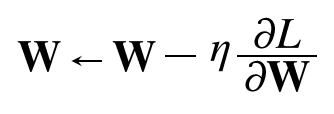
* SGD는 기울어진 방향으로 일정 거리만 가겠다는 단순한 방법 

In [24]:
# SGD 구현

class SGD:
    def __init__(self, lr=0.01): # lr = learning rate(학습률)
        self.lr=lr
        
    def update(self, params, grads): # params, grads 딕셔너리 변수(각각 가중치 매개변수와 기울기를 저장함)
        for key in params.key():
            params[key] -= self.lr * grads[key]

* SGD 클래스를 사용하면 신경망 매개변수의 진행을 다음과 같이 수행할 수 있음

In [25]:
network = TwoLayerNet(. . .)
optimizer = SGD() # 매개변수 갱신 

for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...) # 미니배치
    grads = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grads)
    ...

SyntaxError: invalid syntax (1743560721.py, line 1)

https://lasagne.readthedocs.io/en/latest/user/tutorial.html # 라자냐 딥러닝 프레임 워크 

### 6.1.3 SGD의 단점
* SGD는 단순하고 구현도 쉬우나, 문제에 따라 비효율적일 때가 있음
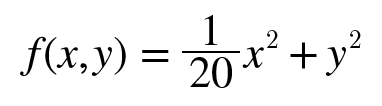
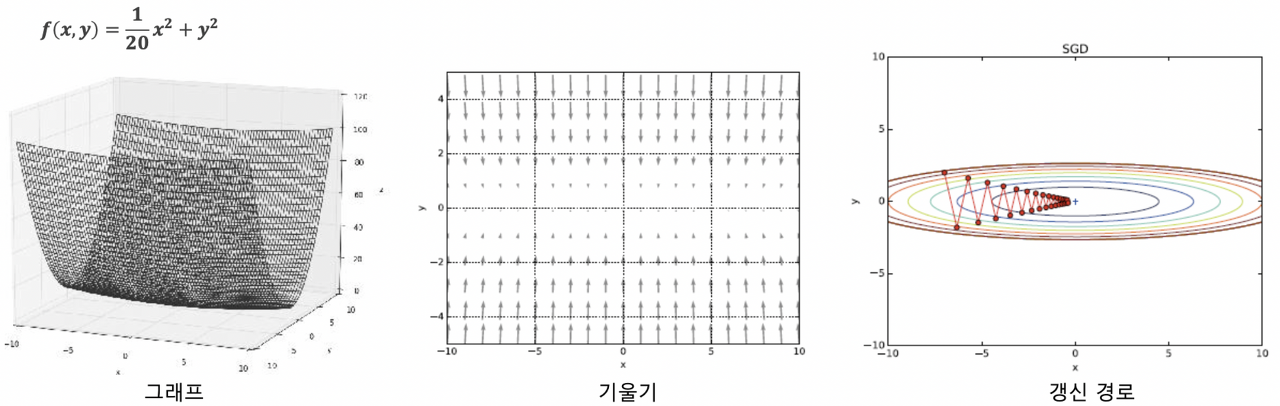


* 함수의 기울기를 그려보면 y축 방향은 크고 x축 방향은 작다는 것이 특징임
* 최솟값이 되는 장소는 (x, y) = (0, 0)이지만, 기울기 대부분은 (0, 0) 방향을 가리키지 않음
* SGD의 단점은 비등방성 함수(방향에 따라 성질, 즉, 여기에서는 기울기가 달라지는 함수)에서는 탐색 경로가 비효율적임
* SGD가 지그재그로 탐색하는 근본 원인은 기울어진 방향이 본래의 최솟값과 다른 방향을 가리켜서라는 점도 생각해볼 필요가 있음

### 6.1.4 모멘텀
* 모멘텀 : 운동량을 뜻하는 단어로, 물리와 관계 있음
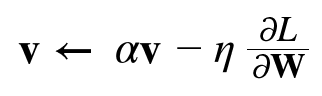
* 기울기 방향으로 힘을 받아 물체가 가속된다는 물리 법칙을 나타냄
* 모멘텀은 공이 그릇의 바닥을 구르는 듯한 움직임을 보여줌
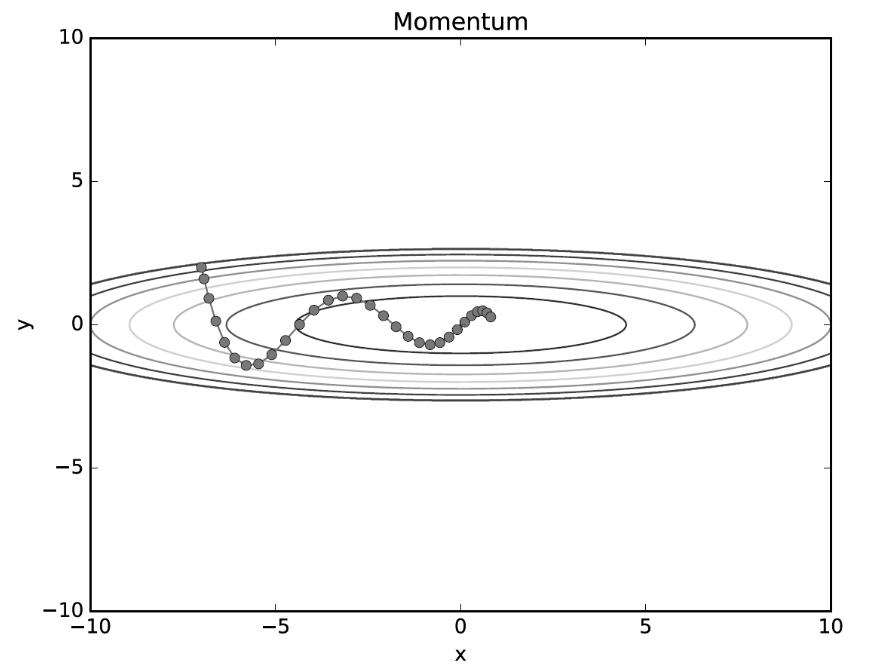

* 모멘텀의 갱신 경로는 공이 그릇 바닥을 구르듯 움직임 -> 지그재그 정도가 덜함
* x축의 힘은 아주 작지만 방향은 변하지 않아서 한 방향으로 일정하게 가속함 
* y축의 힘은 크지만 위아래로 번갈아 받아서 상충하여 속도는 안정적이지 않음 

In [26]:
# 모멘텀 구현

class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

### 6.1.5 AdaGrad 
* 신경망 학습에서는 학습률 값이 중요함(너무 작으면 학습 시간 길어지고, 너무 크면 발산하여 학습이 제대로 이뤄지지 않음)
* 학습률 감소 : 학습률을 점차 줄여가는 방법(각각의 매개변수에 맞춤형 값을 만들어줌)
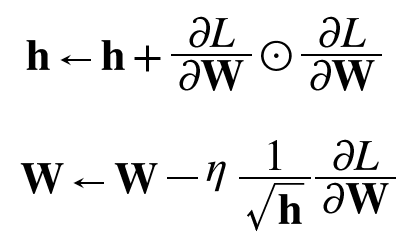

* 과거의 기울기를 제곱하여 계속 더해감 -> 학습을 진행할수록 갱신 강도가 약해짐
* 1/h**1/2 로 학습률 조정, 매개변수의 원소 중에서 많이 움직인(크게 갱신된) 원소는 학습률이 낮아짐, 학습률 감소가 매개변수 원소마다 다르게 적용됨을 뜻함


* RMSProp : 갱신이 되지 않게 되는 경우를 개선, 과거의 모든 기울기를 균일하게 더해가는 것이 아니라, 과거의 기울기는 서서히 잊고, 새로운 기울기 정보를 크게 반영(지수이동평균 - 과거 기울기의 반영 규모를 기하급수적으로 감소시킴)

In [27]:
# AdaGrad 구현

class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

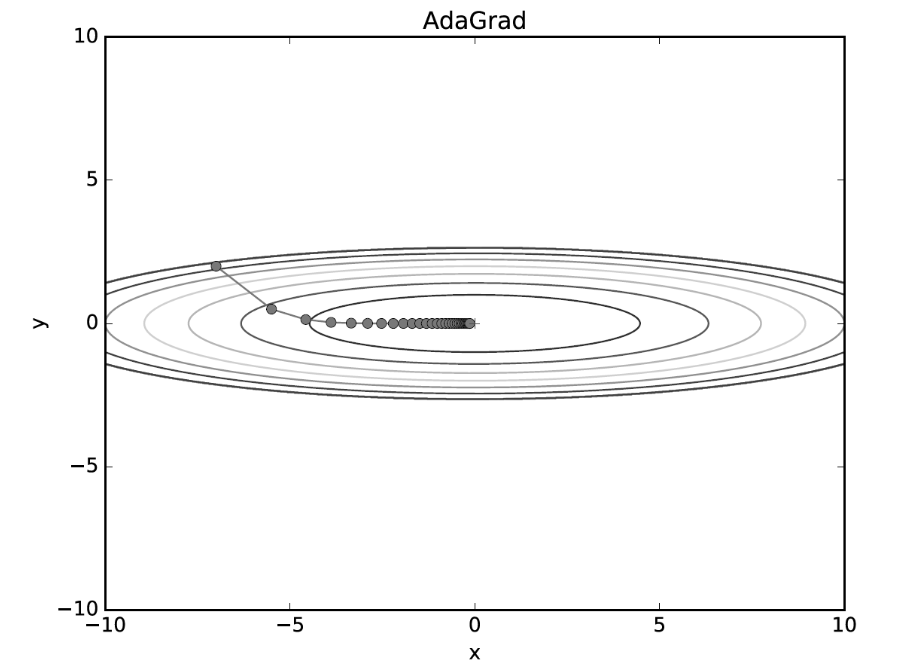
* 최솟값을 향해 효율적으로 움직임, y축 방향은 기울기가 커서 처음에는 크게 움직이지만, 그 큰 움직임에 비례해 갱신 정도도 큰 폭으로 작아지도록 조정됨
* y축 방향으로 갱신 강도가 빠르게 약해지고, 지그재그 움직임이 줄어듦 

In [28]:
# RMSprop 구현

class RMSprop:
    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

### 6.1.6 Adam
* 모멘텀과 AdaGrad 기법을 융합하면 어떨까?라는 생각에서 출발한 기법이라 할 수 있음 -> 매개변수 공간을 효율적으로 탐색
* 하이퍼파라미터의 편향 보정이 됨 

In [29]:
# Adam
class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

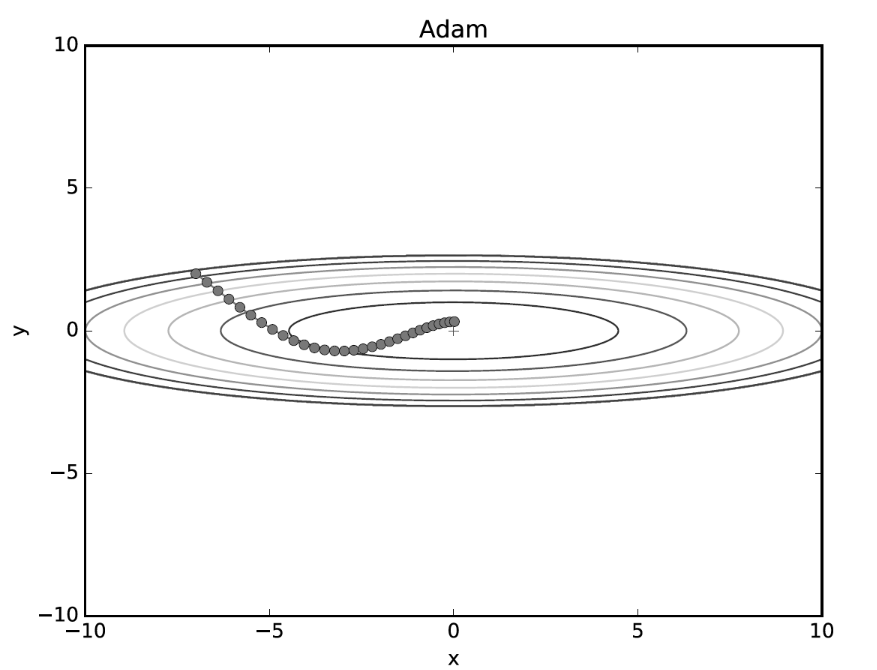
* 모멘텀과 비슷한 패턴이지만, 모멘텀보다 공의 좌우 흔들림이 적음

### 6.1.7 어느 갱신 방법을 이용할 것인가?
* 풀어야 할 문제가 무엇이냐에 따라 달라짐
* 하이퍼파라미터를 어떻게 설정하느냐에 따라서도 결과가 바뀜

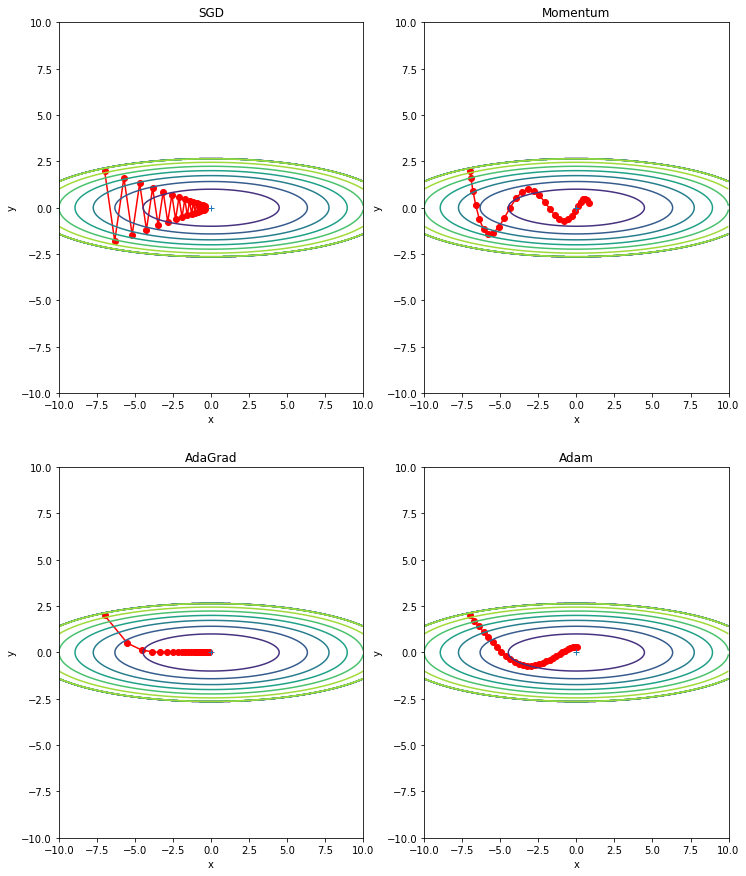

In [30]:
import sys, os
sys.path.append("C:/Users/esj06/Desktop/deep-learning-from-scratch-master")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

plt.figure(figsize=(12, 15))
for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

### 6.1.8 MNIST 데이터셋으로 본 갱신 방법 비교
* SGD의 학습 진도가 가장 느린 것을 알 수 있음 -> 일반적으로 SGD보다 다른 기법이 빠르게 학습하고, 최종 정확도도 높게 나타잠
* 하이퍼파라미터인 학습률과 신경망의 구조(층 깊이 등)에 따라 결과가 달라짐 

===========iteration:0===========
SGD:2.591166923865332
Momentum:2.2946766350957004
AdaGrad:2.038962483707551
Adam:2.2303523916417305
RMSprop:13.473720566816718
===========iteration:100===========
SGD:1.289706167615421
Momentum:0.4169702090823486
AdaGrad:0.12060240209675413
Adam:0.24428468428879066
RMSprop:0.3807422824514162
===========iteration:200===========
SGD:0.7246754979971624
Momentum:0.26974183431055515
AdaGrad:0.10530759894155256
Adam:0.24689167312231158
RMSprop:0.16538580685367035
===========iteration:300===========
SGD:0.6754712587305214
Momentum:0.2720628547010616
AdaGrad:0.15488060850774982
Adam:0.21746946231628478
RMSprop:0.3372708748365132
===========iteration:400===========
SGD:0.4201878221748858
Momentum:0.22123830473013
AdaGrad:0.1561420495734412
Adam:0.2120237128203729
RMSprop:0.14331185226750567
===========iteration:500===========
SGD:0.39770262369399323
Momentum:0.17641975062045961
AdaGrad:0.1008592078707436
Adam:0.11225426722578477
RMSprop:0.12217884256372566
====

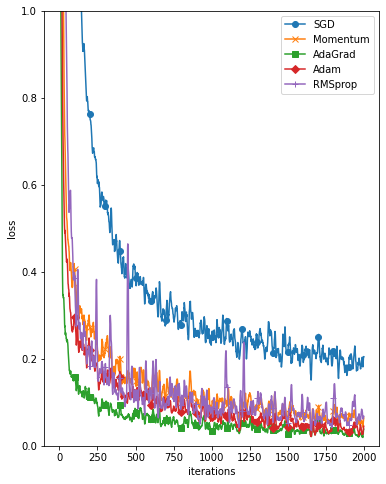

In [31]:
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

plt.figure(figsize=(6, 8))
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D", "RMSprop": "+" }
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

## 6.2 가중치의 초기값
### 6.2.1 초깃값을 0으로 하면?
* 가중치 감소 기법 : 가중치 매개변수의 값이 작아지도록 학습하는 방법으로 가중치 값을 작게 하여 오버피팅이 일어나지 않게 함
* 가중치의 초깃값을 모두 0으로 설정하면? : 학습이 올바로 이뤄지지 않음 (가중치를 균일한 값으로 설정해서는 안 됨)
* 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문 -> 초깃값을 무작위로 설정해야함

### 6.2.2 은닉층의 활성화값 분포


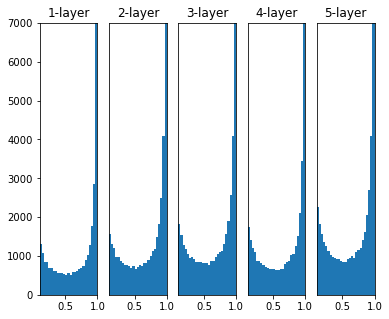

In [32]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터 (각 층의 뉴런은 100개씩)
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
plt.figure(figsize=(6, 5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

* 표준편차 1인 정규분포 이용
* 각 층의 활성화값들이 0과 1에 치우쳐 분포되어 있음을 알 수 있음
* 출력이 0에 가까워지자(or 1에 가까워지자) 그 미분은 0에 다가감 그래서 데이터가 0과 1에 치우쳐 분포하게 되면 역전파의 기울기 값이 점점 작아지다가 사라지는 기울기 소실 문제가 발생함

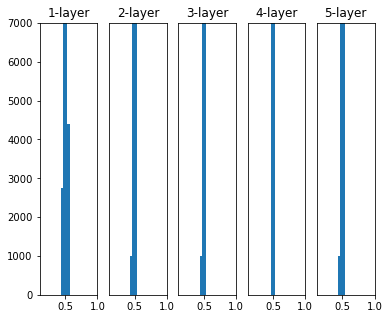

In [33]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험
    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
    # w = np.random.randn(node_num, node_num) * 1

    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
plt.figure(figsize=(6, 5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

* 0.5 부근에 집중되었음 -> 기울기 소실 문제 발생 x
* but 다수의 뉴런이 거의 같은 값을 출력하고 있으니 뉴런을 여러 개 둔 의미가 없어짐 
* 활성화값들이 치우치면 표현력을 제한한다는 관점에서 문제가 됨

#### Xavier 초깃값
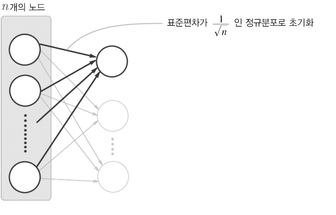
* Xavier 초기값을 사용하면 앞 층에 노드가 많을수록 대상 노드의 초기값으로 설정하는 가중치가 좁게 퍼짐 

In [1]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험
    z = sigmoid(a)
    
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
plt.figure(figsize=(10, 5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

NameError: name 'hidden_layer_size' is not defined

* 층이 깊어지면서 형태가 다소 일그러지지만, 확실히 넓게 분포됨을 알 수 있음 
* 오른쪽으로 갈수록 약간씩 일그러지고 있음 -> tanh 함수를 이용하면 개선됨
* 활성화 함수용으로는 원점에서 대칭인 함수가 바람직함

### 6.2.3 ReLU를 사용할 때의 가중치 초깃값
* ReLU 함수를 이용할 때는 ReLU에 특화된 초깃값을 이용하라고 권장함
* He 초깃값은 앞 계층의 노드가 n개일 때, 표준편차가 (2/n)**1/2인 정규분포를 사용함
* ReLU는 음의 영역이 0이라서 더 넓게 분포시키기 위해 2배의 계수가 필요하다고 할 수 있음

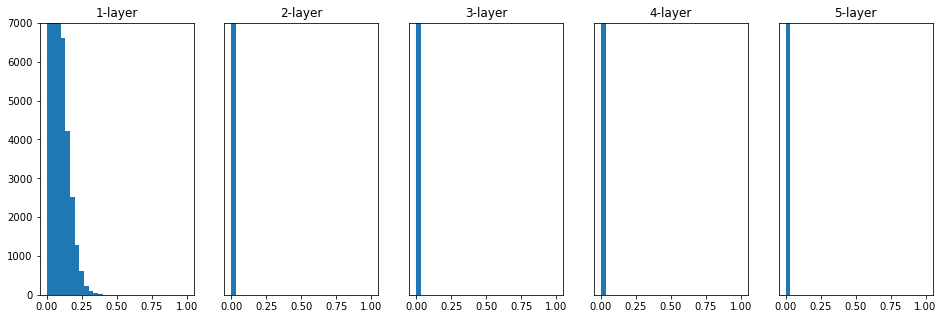

In [55]:
# 표준편차가 0.01인 정규분포를 가중치 초깃값으로 사용한 경우

x = np.random.randn(1000, 100) 
node_num = 100                 
hidden_layer_size = 5          
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]


    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x, w)
    z = ReLU(a)

    activations[i] = z

# 히스토그램 그리기
plt.figure(figsize=(16, 5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

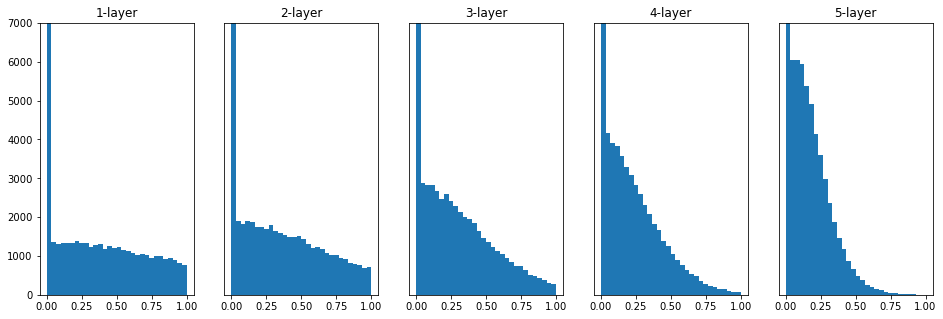

In [57]:
# Xavier 초깃값을 사용한 경우 

x = np.random.randn(1000, 100) 
node_num = 100                 
hidden_layer_size = 5          
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)

    a = np.dot(x, w)
    z = ReLU(a)

    activations[i] = z

# 히스토그램 그리기
plt.figure(figsize=(16, 5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

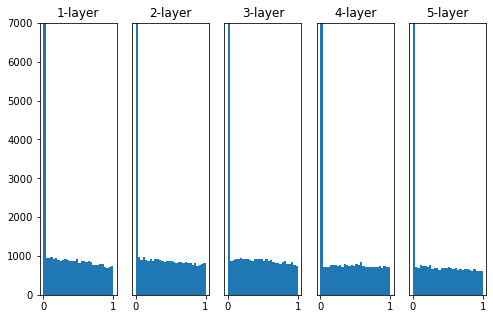

In [59]:
# He 초깃값을 사용한 경우 

x = np.random.randn(1000, 100) 
node_num = 100                
hidden_layer_size = 5          
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)
    z = ReLU(a)

    activations[i] = z

# 히스토그램 그리기
plt.figure(figsize=(8, 5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

* std=0.01 : 학습이 거의 일어나지 x
* Xavier : 치우침이 조금씩 커짐 -> 층이 깊어지면 활성화값들의 치우침도 커지고, 기울기 소실 문제를 일으킴
* He : 분포 균일

### 6.2.4 MNIST 데이터셋으로 본 가중치 초깃값 비교
* std=0.01일 때는 학습이 전혀 이뤄지지 않음. 활성화값의 분포에서 본 것처럼 순전파 때 너무 작은 값(0 근처로 밀접한 데이터)이 흐르기 때문 -> 역전파 때의 기울기도 작아져 가중치가 거의 갱신되지 않음
* Xavier, He 초기값의 경우는 순조롭게 이루어짐

## 6.3 배치 정규화
* 가중치의 초깃값을 적절히 설정하면 각 층의 활성화값 분포가 적당히 퍼지면서 학습이 원할하게 수행됨
* 각 층이 활성화를 적당히 퍼뜨리도록 '강제'해보는 아이디어에서 출발
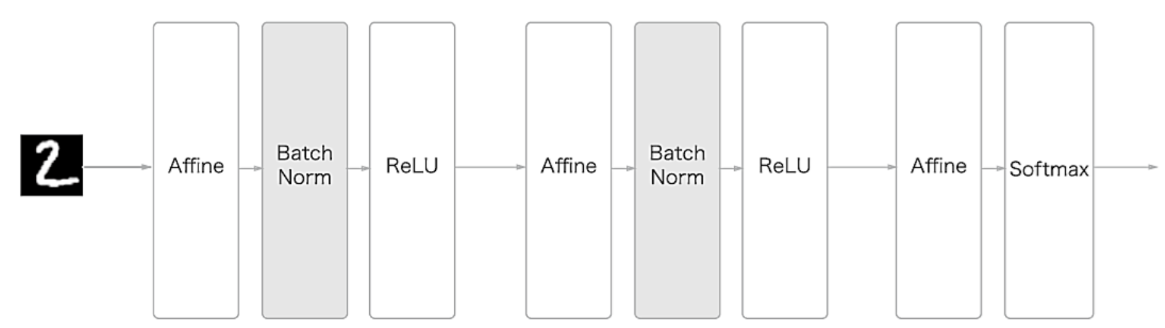

* 배치 정규화는 그 이름과 같이 학습 시 미니배치를 단위로 정규화함(데이터 분포가 평균이 0, 분산이 1이 되도록 정규화함)



### 6.3.1 배치 정규화 알고리즘
* 학습을 빨리 진행할 수 있음(학습 속도 개선)
* 초깃값에 크게 의존하지 않음
* 오버피팅을 억제함(드롭아웃 등의 필요성 감소)

### 6.3.2 배치 정규화의 효과
* 거의 모든 경우에서 배치 정규화를 사용할 때의 학습 진도가 빠른 것으로 나타남
* 배치 정규화를 사용하면 학습이 빨라지며, 가중치 초깃값에 크게 의존하지 않아도 됨

============== 1/16 ==============
epoch:0 | 0.087 - 0.126


C:\Users/esj06/Desktop/deep-learning-from-scratch-master\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users/esj06/Desktop/deep-learning-from-scratch-master\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.13
epoch:2 | 0.097 - 0.129
epoch:3 | 0.097 - 0.165
epoch:4 | 0.097 - 0.179
epoch:5 | 0.097 - 0.202
epoch:6 | 0.097 - 0.224
epoch:7 | 0.097 - 0.239
epoch:8 | 0.097 - 0.254
epoch:9 | 0.097 - 0.278
epoch:10 | 0.097 - 0.305
epoch:11 | 0.097 - 0.323
epoch:12 | 0.097 - 0.34
epoch:13 | 0.097 - 0.351
epoch:14 | 0.097 - 0.358
epoch:15 | 0.097 - 0.368
epoch:16 | 0.097 - 0.389
epoch:17 | 0.097 - 0.4
epoch:18 | 0.097 - 0.419


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.097 - 0.424
============== 2/16 ==============
epoch:0 | 0.117 - 0.096


C:\Users/esj06/Desktop/deep-learning-from-scratch-master\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users/esj06/Desktop/deep-learning-from-scratch-master\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users/esj06/Desktop/deep-learning-from-scratch-master\common\functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


epoch:1 | 0.097 - 0.1
epoch:2 | 0.097 - 0.124
epoch:3 | 0.097 - 0.14
epoch:4 | 0.097 - 0.175
epoch:5 | 0.097 - 0.203
epoch:6 | 0.097 - 0.218
epoch:7 | 0.097 - 0.242
epoch:8 | 0.097 - 0.26
epoch:9 | 0.097 - 0.28
epoch:10 | 0.097 - 0.298
epoch:11 | 0.097 - 0.326
epoch:12 | 0.097 - 0.346
epoch:13 | 0.097 - 0.357
epoch:14 | 0.097 - 0.373
epoch:15 | 0.097 - 0.4
epoch:16 | 0.097 - 0.419
epoch:17 | 0.097 - 0.44
epoch:18 | 0.097 - 0.465


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.097 - 0.48
============== 3/16 ==============
epoch:0 | 0.103 - 0.077
epoch:1 | 0.282 - 0.1
epoch:2 | 0.456 - 0.168
epoch:3 | 0.51 - 0.231
epoch:4 | 0.619 - 0.266
epoch:5 | 0.658 - 0.307
epoch:6 | 0.721 - 0.336
epoch:7 | 0.762 - 0.376
epoch:8 | 0.81 - 0.406
epoch:9 | 0.837 - 0.441
epoch:10 | 0.859 - 0.477
epoch:11 | 0.873 - 0.501
epoch:12 | 0.892 - 0.527
epoch:13 | 0.912 - 0.551
epoch:14 | 0.918 - 0.581
epoch:15 | 0.932 - 0.596
epoch:16 | 0.938 - 0.618
epoch:17 | 0.951 - 0.642
epoch:18 | 0.952 - 0.646


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.955 - 0.665
============== 4/16 ==============
epoch:0 | 0.073 - 0.128
epoch:1 | 0.239 - 0.125
epoch:2 | 0.376 - 0.157
epoch:3 | 0.47 - 0.232
epoch:4 | 0.54 - 0.316
epoch:5 | 0.588 - 0.398
epoch:6 | 0.626 - 0.461
epoch:7 | 0.663 - 0.505
epoch:8 | 0.682 - 0.555
epoch:9 | 0.711 - 0.586
epoch:10 | 0.725 - 0.614
epoch:11 | 0.742 - 0.622
epoch:12 | 0.768 - 0.65
epoch:13 | 0.768 - 0.659
epoch:14 | 0.787 - 0.674
epoch:15 | 0.796 - 0.688
epoch:16 | 0.81 - 0.702
epoch:17 | 0.831 - 0.712
epoch:18 | 0.839 - 0.722


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.844 - 0.737
============== 5/16 ==============
epoch:0 | 0.092 - 0.123
epoch:1 | 0.093 - 0.182
epoch:2 | 0.092 - 0.292
epoch:3 | 0.088 - 0.414
epoch:4 | 0.101 - 0.512
epoch:5 | 0.136 - 0.575
epoch:6 | 0.155 - 0.639
epoch:7 | 0.182 - 0.682
epoch:8 | 0.203 - 0.721
epoch:9 | 0.22 - 0.759
epoch:10 | 0.236 - 0.785
epoch:11 | 0.241 - 0.799
epoch:12 | 0.244 - 0.813
epoch:13 | 0.251 - 0.828
epoch:14 | 0.258 - 0.836
epoch:15 | 0.267 - 0.846
epoch:16 | 0.271 - 0.864
epoch:17 | 0.271 - 0.877
epoch:18 | 0.282 - 0.884


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.292 - 0.897
============== 6/16 ==============
epoch:0 | 0.137 - 0.065
epoch:1 | 0.105 - 0.187
epoch:2 | 0.138 - 0.474
epoch:3 | 0.144 - 0.635
epoch:4 | 0.13 - 0.7
epoch:5 | 0.18 - 0.771
epoch:6 | 0.158 - 0.806
epoch:7 | 0.177 - 0.835
epoch:8 | 0.161 - 0.843
epoch:9 | 0.117 - 0.855
epoch:10 | 0.116 - 0.879
epoch:11 | 0.116 - 0.889
epoch:12 | 0.116 - 0.902
epoch:13 | 0.116 - 0.914
epoch:14 | 0.116 - 0.916
epoch:15 | 0.116 - 0.926
epoch:16 | 0.116 - 0.935
epoch:17 | 0.116 - 0.943
epoch:18 | 0.116 - 0.95


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.12 - 0.958
============== 7/16 ==============
epoch:0 | 0.105 - 0.11
epoch:1 | 0.116 - 0.218
epoch:2 | 0.116 - 0.545
epoch:3 | 0.116 - 0.688
epoch:4 | 0.116 - 0.761
epoch:5 | 0.116 - 0.803
epoch:6 | 0.116 - 0.849
epoch:7 | 0.116 - 0.876
epoch:8 | 0.116 - 0.895
epoch:9 | 0.116 - 0.922
epoch:10 | 0.116 - 0.935
epoch:11 | 0.116 - 0.94
epoch:12 | 0.116 - 0.949
epoch:13 | 0.116 - 0.96
epoch:14 | 0.116 - 0.966
epoch:15 | 0.116 - 0.97
epoch:16 | 0.116 - 0.978
epoch:17 | 0.116 - 0.982
epoch:18 | 0.116 - 0.989


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.989
============== 8/16 ==============
epoch:0 | 0.117 - 0.094
epoch:1 | 0.105 - 0.422
epoch:2 | 0.117 - 0.649
epoch:3 | 0.117 - 0.722
epoch:4 | 0.116 - 0.782
epoch:5 | 0.116 - 0.834
epoch:6 | 0.116 - 0.874
epoch:7 | 0.117 - 0.91
epoch:8 | 0.117 - 0.946
epoch:9 | 0.117 - 0.964
epoch:10 | 0.117 - 0.975
epoch:11 | 0.117 - 0.982
epoch:12 | 0.117 - 0.983
epoch:13 | 0.117 - 0.987
epoch:14 | 0.117 - 0.992
epoch:15 | 0.117 - 0.994
epoch:16 | 0.117 - 0.997
epoch:17 | 0.117 - 0.998
epoch:18 | 0.117 - 0.998


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.999
============== 9/16 ==============
epoch:0 | 0.116 - 0.107
epoch:1 | 0.116 - 0.357
epoch:2 | 0.116 - 0.724
epoch:3 | 0.116 - 0.775
epoch:4 | 0.116 - 0.768
epoch:5 | 0.116 - 0.827
epoch:6 | 0.116 - 0.924
epoch:7 | 0.116 - 0.951
epoch:8 | 0.116 - 0.976
epoch:9 | 0.117 - 0.974
epoch:10 | 0.116 - 0.989
epoch:11 | 0.117 - 0.995
epoch:12 | 0.116 - 0.994
epoch:13 | 0.116 - 0.996
epoch:14 | 0.116 - 0.997
epoch:15 | 0.116 - 0.997
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 0.999
epoch:18 | 0.116 - 1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.116 - 0.099
epoch:1 | 0.116 - 0.651
epoch:2 | 0.117 - 0.796
epoch:3 | 0.117 - 0.845
epoch:4 | 0.117 - 0.856
epoch:5 | 0.117 - 0.875
epoch:6 | 0.116 - 0.883
epoch:7 | 0.116 - 0.896
epoch:8 | 0.116 - 0.931
epoch:9 | 0.116 - 0.983
epoch:10 | 0.117 - 0.99
epoch:11 | 0.117 - 0.989
epoch:12 | 0.117 - 0.99
epoch:13 | 0.117 - 0.991
epoch:14 | 0.117 - 0.996
epoch:15 | 0.117 - 0.997
epoch:16 | 0.117 - 0.984
epoch:17 | 0.117 - 0.998
epoch:18 | 0.117 - 0.998


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.998
============== 11/16 ==============
epoch:0 | 0.1 - 0.143
epoch:1 | 0.117 - 0.573
epoch:2 | 0.117 - 0.571
epoch:3 | 0.117 - 0.72
epoch:4 | 0.117 - 0.792
epoch:5 | 0.117 - 0.854
epoch:6 | 0.117 - 0.874
epoch:7 | 0.117 - 0.894
epoch:8 | 0.117 - 0.869
epoch:9 | 0.117 - 0.917
epoch:10 | 0.116 - 0.947
epoch:11 | 0.116 - 0.947
epoch:12 | 0.116 - 0.942
epoch:13 | 0.116 - 0.958
epoch:14 | 0.116 - 0.974
epoch:15 | 0.116 - 0.868
epoch:16 | 0.116 - 0.961
epoch:17 | 0.116 - 0.963
epoch:18 | 0.116 - 0.971


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.966
============== 12/16 ==============
epoch:0 | 0.117 - 0.255
epoch:1 | 0.117 - 0.521
epoch:2 | 0.117 - 0.559
epoch:3 | 0.117 - 0.598
epoch:4 | 0.117 - 0.594
epoch:5 | 0.117 - 0.611
epoch:6 | 0.117 - 0.364
epoch:7 | 0.117 - 0.632
epoch:8 | 0.117 - 0.706
epoch:9 | 0.117 - 0.689
epoch:10 | 0.117 - 0.709
epoch:11 | 0.117 - 0.782
epoch:12 | 0.117 - 0.796
epoch:13 | 0.117 - 0.772
epoch:14 | 0.117 - 0.802
epoch:15 | 0.117 - 0.803
epoch:16 | 0.117 - 0.813
epoch:17 | 0.117 - 0.813
epoch:18 | 0.117 - 0.788


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.805
============== 13/16 ==============
epoch:0 | 0.117 - 0.199
epoch:1 | 0.117 - 0.452
epoch:2 | 0.117 - 0.553
epoch:3 | 0.117 - 0.562
epoch:4 | 0.117 - 0.558
epoch:5 | 0.117 - 0.52
epoch:6 | 0.117 - 0.589
epoch:7 | 0.117 - 0.6
epoch:8 | 0.117 - 0.586
epoch:9 | 0.117 - 0.603
epoch:10 | 0.117 - 0.608
epoch:11 | 0.117 - 0.597
epoch:12 | 0.117 - 0.604
epoch:13 | 0.117 - 0.618
epoch:14 | 0.117 - 0.698
epoch:15 | 0.117 - 0.675
epoch:16 | 0.117 - 0.695
epoch:17 | 0.117 - 0.703
epoch:18 | 0.117 - 0.706
epoch:19 | 0.117 - 0.704


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


============== 14/16 ==============
epoch:0 | 0.117 - 0.097
epoch:1 | 0.116 - 0.38
epoch:2 | 0.116 - 0.378
epoch:3 | 0.116 - 0.521
epoch:4 | 0.116 - 0.585
epoch:5 | 0.116 - 0.556
epoch:6 | 0.116 - 0.592
epoch:7 | 0.116 - 0.584
epoch:8 | 0.116 - 0.595
epoch:9 | 0.116 - 0.606
epoch:10 | 0.116 - 0.602
epoch:11 | 0.116 - 0.611
epoch:12 | 0.116 - 0.61
epoch:13 | 0.116 - 0.61
epoch:14 | 0.116 - 0.615
epoch:15 | 0.116 - 0.615
epoch:16 | 0.116 - 0.614
epoch:17 | 0.116 - 0.614
epoch:18 | 0.116 - 0.611


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.611
============== 15/16 ==============
epoch:0 | 0.117 - 0.187
epoch:1 | 0.105 - 0.381
epoch:2 | 0.116 - 0.384
epoch:3 | 0.117 - 0.468
epoch:4 | 0.117 - 0.469
epoch:5 | 0.117 - 0.497
epoch:6 | 0.117 - 0.511
epoch:7 | 0.117 - 0.506
epoch:8 | 0.117 - 0.508
epoch:9 | 0.117 - 0.519
epoch:10 | 0.117 - 0.512
epoch:11 | 0.117 - 0.513
epoch:12 | 0.117 - 0.513
epoch:13 | 0.117 - 0.513
epoch:14 | 0.117 - 0.515
epoch:15 | 0.117 - 0.516
epoch:16 | 0.117 - 0.518
epoch:17 | 0.117 - 0.505
epoch:18 | 0.117 - 0.542
epoch:19 | 0.117 - 0.61


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


============== 16/16 ==============
epoch:0 | 0.117 - 0.168
epoch:1 | 0.117 - 0.319
epoch:2 | 0.117 - 0.302
epoch:3 | 0.117 - 0.306
epoch:4 | 0.117 - 0.42
epoch:5 | 0.117 - 0.42
epoch:6 | 0.117 - 0.398
epoch:7 | 0.117 - 0.427
epoch:8 | 0.117 - 0.428
epoch:9 | 0.117 - 0.432
epoch:10 | 0.117 - 0.432
epoch:11 | 0.117 - 0.431
epoch:12 | 0.117 - 0.43
epoch:13 | 0.117 - 0.431
epoch:14 | 0.117 - 0.421
epoch:15 | 0.117 - 0.403
epoch:16 | 0.117 - 0.416
epoch:17 | 0.117 - 0.434
epoch:18 | 0.117 - 0.433
epoch:19 | 0.117 - 0.433


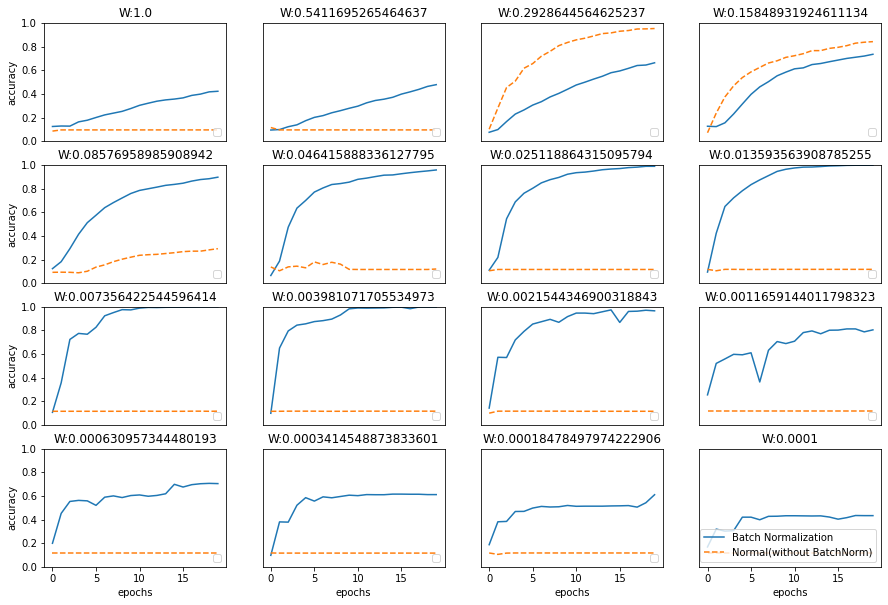

In [38]:
import sys, os
sys.path.append("C:/Users/esj06/Desktop/deep-learning-from-scratch-master")
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


plt.figure(figsize=(15, 10))
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

* 실선이 배치 정규화를 사용한 경우, 점선이 사용하지 않은 경우
* 배치 정규화를 사용할 때의 학습 진도가 빠른 것으로 나타남
* 학습이 빨라지며, 가중치 초깃값에 크게 의존하지 않아도 됨

===========iteration:0===========
std=0.01:2.302470165820659
Xavier:2.3140179601734756
He:2.4153602997776282
===========iteration:100===========
std=0.01:2.302989993033561
Xavier:2.2766533646818234
He:1.586996132985179
===========iteration:200===========
std=0.01:2.3015354138247224
Xavier:2.219893557814906
He:0.9696832393306352
===========iteration:300===========
std=0.01:2.301351112933628
Xavier:2.0778340504591952
He:0.5738456934955527
===========iteration:400===========
std=0.01:2.303801761189531
Xavier:1.8668581707951348
He:0.5138858610130347
===========iteration:500===========
std=0.01:2.3050913377695386
Xavier:1.4110243482358649
He:0.43957464032734844
===========iteration:600===========
std=0.01:2.302271291637514
Xavier:0.9526328647980259
He:0.35254089702973884
===========iteration:700===========
std=0.01:2.3018115383027187
Xavier:0.6508234658395612
He:0.28370953086194056
===========iteration:800===========
std=0.01:2.3012608902032823
Xavier:0.6132770745710565
He:0.395135121147775

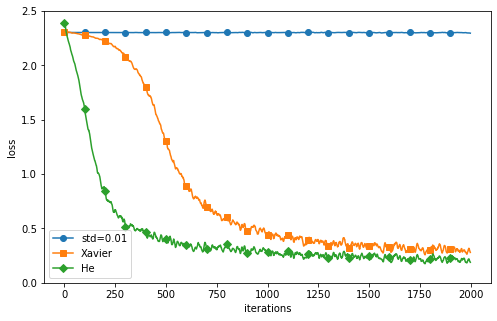

In [39]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

plt.figure(figsize=(8, 5))
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

## 6.4 바른 학습을 위해
* 오버피팅 : 신경망이 훈련 데이터에만 지나치게 적응되어 그 외의 데이터에는 제대로 대응하지 못하는 상태

### 6.4.1 오버피팅
* 오버피팅은 주로 다음의 두 경우에 일어남
* 매개변수가 많고 표현력이 높은 모델
* 훈련 데이터가 적음

In [43]:
import sys, os
sys.path.append("C:/Users/esj06/Desktop/deep-learning-from-scratch-master")
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

In [42]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)


x_train = x_train[:300]
t_train = t_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break
            
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

NameError: name 'weight_decay_lambda' is not defined

* 정확도가 크게 벌어지는 것은 훈련 데이터에만 적응해버린 결과임
* 훈련 때 사용하지 않은 범용 데이터(시험 데이터)에는 제대로 대응하지 못하는 것을 확인할 수 있음

### 6.4.2 가중치 감소
* 가중치 감소 : 학습 과정에서 큰 가중치에 대해서는 그에 상응하는 큰 페널티를 부과하여 오버피팅을 억제하는 방법

epoch:0, train acc:0.09666666666666666, test acc:0.1128
epoch:1, train acc:0.09666666666666666, test acc:0.1177
epoch:2, train acc:0.11, test acc:0.1242
epoch:3, train acc:0.11, test acc:0.1307
epoch:4, train acc:0.12, test acc:0.1392
epoch:5, train acc:0.15666666666666668, test acc:0.1488
epoch:6, train acc:0.17, test acc:0.1551
epoch:7, train acc:0.18666666666666668, test acc:0.164
epoch:8, train acc:0.22666666666666666, test acc:0.1746
epoch:9, train acc:0.25, test acc:0.1944
epoch:10, train acc:0.30666666666666664, test acc:0.2132
epoch:11, train acc:0.33666666666666667, test acc:0.2311
epoch:12, train acc:0.36, test acc:0.2472
epoch:13, train acc:0.38, test acc:0.2514
epoch:14, train acc:0.41, test acc:0.2772
epoch:15, train acc:0.44666666666666666, test acc:0.2935
epoch:16, train acc:0.4633333333333333, test acc:0.3038
epoch:17, train acc:0.4633333333333333, test acc:0.3136
epoch:18, train acc:0.47333333333333333, test acc:0.3258
epoch:19, train acc:0.4766666666666667, test acc:0

epoch:160, train acc:0.84, test acc:0.6589
epoch:161, train acc:0.8366666666666667, test acc:0.6608
epoch:162, train acc:0.8433333333333334, test acc:0.6635
epoch:163, train acc:0.8333333333333334, test acc:0.653
epoch:164, train acc:0.81, test acc:0.6664
epoch:165, train acc:0.8333333333333334, test acc:0.6609
epoch:166, train acc:0.82, test acc:0.6486
epoch:167, train acc:0.8366666666666667, test acc:0.6667
epoch:168, train acc:0.84, test acc:0.6741
epoch:169, train acc:0.8533333333333334, test acc:0.6765
epoch:170, train acc:0.8366666666666667, test acc:0.6579
epoch:171, train acc:0.8366666666666667, test acc:0.6621
epoch:172, train acc:0.8433333333333334, test acc:0.6706
epoch:173, train acc:0.8366666666666667, test acc:0.6632
epoch:174, train acc:0.8466666666666667, test acc:0.677
epoch:175, train acc:0.8566666666666667, test acc:0.6803
epoch:176, train acc:0.8433333333333334, test acc:0.6711
epoch:177, train acc:0.8433333333333334, test acc:0.6725
epoch:178, train acc:0.85, test 

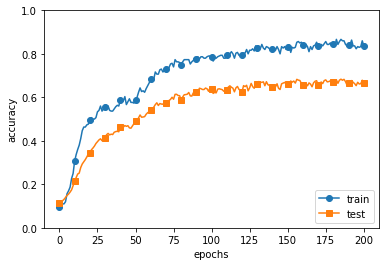

In [44]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

* 가중치 감소를 이용하지 않은 위와 비교하면 그 차이가 줄어든 것을 알 수 있음
* 정확도가 100%에 도달하지 못한 점도 주목해야 함

### 6.4.3 드롭아웃
* 신경망 모델이 복잡해지면 가중치 감소만으로는 대응하기 어려워짐
* 드롭아웃 : 뉴런을 임의로 삭제하면서 학습하는 방법, 훈련 때 은닉층의 뉴런을 무작위로 골라 삭제
* 훈련 때는 데이터를 흘릴 때마다 삭제할 뉴런을 무작위로 선택, 시험 때는 모든 뉴런에 신호를 전달
* 시험 때는 각 뉴런의 출력에 훈련 때 삭제 안 한 비율을 곱하여 출력 
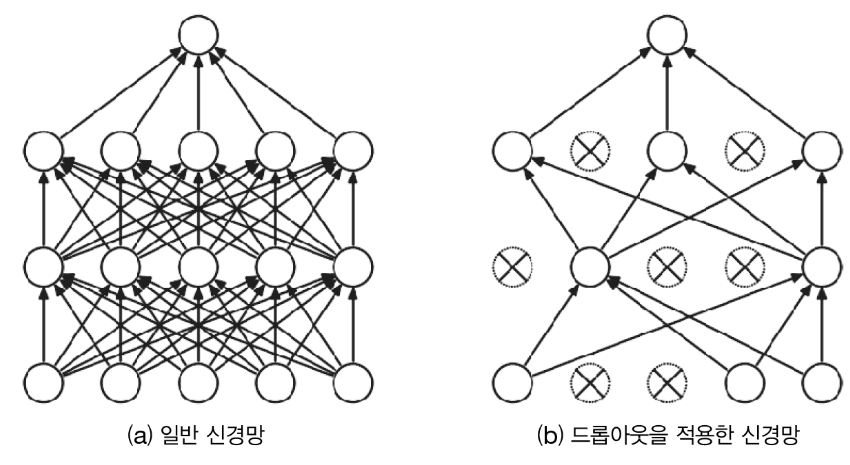

In [45]:
# dropout 구현
class Dropout:
    def __init__(self, dropout_ratio=0.5):
         self.dropout_ratio = dropout_ratio
         self.mask = None # x와 형상이 같은 배열을 무작위로 생성
    
    def forward(self, x, train_flg=True):
         if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
         else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout): # ReLU와 동일 
        return dout * self.mask

In [46]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.optimizer import *

class Trainer:
    """신경망 훈련을 대신 해주는 클래스
    """
    def __init__(self, network, x_train, t_train, x_test, t_test,
                 epochs=20, mini_batch_size=100,
                 optimizer='SGD', optimizer_param={'lr':0.01}, 
                 evaluate_sample_num_per_epoch=None, verbose=True):
        self.network = network
        self.verbose = verbose
        self.x_train = x_train
        self.t_train = t_train
        self.x_test = x_test
        self.t_test = t_test
        self.epochs = epochs
        self.batch_size = mini_batch_size
        self.evaluate_sample_num_per_epoch = evaluate_sample_num_per_epoch

        # optimzer
        optimizer_class_dict = {'sgd':SGD, 'momentum':Momentum, 'nesterov':Nesterov,
                                'adagrad':AdaGrad, 'rmsprpo':RMSprop, 'adam':Adam}
        self.optimizer = optimizer_class_dict[optimizer.lower()](**optimizer_param)
        
        self.train_size = x_train.shape[0]
        self.iter_per_epoch = max(self.train_size / mini_batch_size, 1)
        self.max_iter = int(epochs * self.iter_per_epoch)
        self.current_iter = 0
        self.current_epoch = 0
        
        self.train_loss_list = []
        self.train_acc_list = []
        self.test_acc_list = []

    def train_step(self):
        batch_mask = np.random.choice(self.train_size, self.batch_size)
        x_batch = self.x_train[batch_mask]
        t_batch = self.t_train[batch_mask]
        
        grads = self.network.gradient(x_batch, t_batch)
        self.optimizer.update(self.network.params, grads)
        
        loss = self.network.loss(x_batch, t_batch)
        self.train_loss_list.append(loss)
        if self.verbose: print("train loss:" + str(loss))
        
        if self.current_iter % self.iter_per_epoch == 0:
            self.current_epoch += 1
            
            x_train_sample, t_train_sample = self.x_train, self.t_train
            x_test_sample, t_test_sample = self.x_test, self.t_test
            if not self.evaluate_sample_num_per_epoch is None:
                t = self.evaluate_sample_num_per_epoch
                x_train_sample, t_train_sample = self.x_train[:t], self.t_train[:t]
                x_test_sample, t_test_sample = self.x_test[:t], self.t_test[:t]
                
            train_acc = self.network.accuracy(x_train_sample, t_train_sample)
            test_acc = self.network.accuracy(x_test_sample, t_test_sample)
            self.train_acc_list.append(train_acc)
            self.test_acc_list.append(test_acc)

            if self.verbose: print("=== epoch:" + str(self.current_epoch) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc) + " ===")
        self.current_iter += 1

    def train(self):
        for i in range(self.max_iter):
            self.train_step()

        test_acc = self.network.accuracy(self.x_test, self.t_test)

        if self.verbose:
            print("=============== Final Test Accuracy ===============")
            print("test acc:" + str(test_acc))

train loss:2.2893149507673876
=== epoch:1, train acc:0.11666666666666667, test acc:0.0961 ===
train loss:2.298168220775492
train loss:2.3043874776157836
train loss:2.284406133695804
=== epoch:2, train acc:0.11666666666666667, test acc:0.0966 ===
train loss:2.291320391868395
train loss:2.2761829557024713
train loss:2.288831238075679
=== epoch:3, train acc:0.11666666666666667, test acc:0.0985 ===
train loss:2.2898768749755494
train loss:2.2846753432962768
train loss:2.278225321569334
=== epoch:4, train acc:0.11666666666666667, test acc:0.0994 ===
train loss:2.2734667896364296
train loss:2.2906885496539093
train loss:2.2894048517960117
=== epoch:5, train acc:0.11666666666666667, test acc:0.0994 ===
train loss:2.3045697467828234
train loss:2.274416217520761
train loss:2.2921236974649926
=== epoch:6, train acc:0.11333333333333333, test acc:0.1007 ===
train loss:2.278758284272004
train loss:2.2890872464142635
train loss:2.278507790898653
=== epoch:7, train acc:0.11333333333333333, test acc:0

=== epoch:56, train acc:0.30333333333333334, test acc:0.2388 ===
train loss:2.2260816721899586
train loss:2.220924102841363
train loss:2.213027733882788
=== epoch:57, train acc:0.30666666666666664, test acc:0.2412 ===
train loss:2.2236040775520074
train loss:2.219698726608797
train loss:2.210036613080434
=== epoch:58, train acc:0.32666666666666666, test acc:0.246 ===
train loss:2.206156359578444
train loss:2.2121716763763497
train loss:2.2268432959395374
=== epoch:59, train acc:0.3233333333333333, test acc:0.2465 ===
train loss:2.2051186501354114
train loss:2.223275840110104
train loss:2.2110207317828645
=== epoch:60, train acc:0.32, test acc:0.2447 ===
train loss:2.22249362239691
train loss:2.223492580722143
train loss:2.204822229688402
=== epoch:61, train acc:0.32666666666666666, test acc:0.2461 ===
train loss:2.2000373827225324
train loss:2.1761189886036614
train loss:2.2396202152108624
=== epoch:62, train acc:0.32666666666666666, test acc:0.2462 ===
train loss:2.2113978404331345
tr

=== epoch:112, train acc:0.4, test acc:0.3335 ===
train loss:2.061487720017219
train loss:2.009433826585113
train loss:2.069094369981109
=== epoch:113, train acc:0.4033333333333333, test acc:0.3353 ===
train loss:2.0778585664894003
train loss:2.081524618445475
train loss:2.0966083168837373
=== epoch:114, train acc:0.41, test acc:0.3382 ===
train loss:2.003825589093311
train loss:2.110541148146552
train loss:2.091351806783008
=== epoch:115, train acc:0.4166666666666667, test acc:0.3434 ===
train loss:2.087187273155325
train loss:2.0445557780595265
train loss:2.0438684612198
=== epoch:116, train acc:0.41, test acc:0.3418 ===
train loss:2.081951567270684
train loss:2.0220237267140733
train loss:2.0758064583142426
=== epoch:117, train acc:0.41333333333333333, test acc:0.3448 ===
train loss:2.052710586996125
train loss:2.059699588261785
train loss:2.034682590409672
=== epoch:118, train acc:0.42, test acc:0.3466 ===
train loss:2.072658286003919
train loss:2.035084428819735
train loss:1.99005

=== epoch:168, train acc:0.47, test acc:0.4034 ===
train loss:1.8029568773065092
train loss:1.8644153304511601
train loss:1.800282074011886
=== epoch:169, train acc:0.4666666666666667, test acc:0.4032 ===
train loss:1.8147258193604516
train loss:1.7755040346246136
train loss:1.8359781733344736
=== epoch:170, train acc:0.47, test acc:0.4056 ===
train loss:1.8586731220130084
train loss:1.787364154821834
train loss:1.8529599246250694
=== epoch:171, train acc:0.47, test acc:0.407 ===
train loss:1.8120163023992797
train loss:1.8955859359733773
train loss:1.814708330994107
=== epoch:172, train acc:0.47, test acc:0.409 ===
train loss:1.8032342060081006
train loss:1.7446503199155137
train loss:1.8340791005901642
=== epoch:173, train acc:0.46, test acc:0.4068 ===
train loss:1.8475220328714153
train loss:1.7469167701401784
train loss:1.8357552181202963
=== epoch:174, train acc:0.4633333333333333, test acc:0.4078 ===
train loss:1.829369371593055
train loss:1.7797501727426566
train loss:1.79138324

=== epoch:223, train acc:0.5333333333333333, test acc:0.4555 ===
train loss:1.5788473791955162
train loss:1.467980629727156
train loss:1.4984132484017982
=== epoch:224, train acc:0.53, test acc:0.4564 ===
train loss:1.5533081619912628
train loss:1.5436091751763836
train loss:1.433934058354009
=== epoch:225, train acc:0.5333333333333333, test acc:0.4565 ===
train loss:1.5499725878435573
train loss:1.3385989481633132
train loss:1.403721070837648
=== epoch:226, train acc:0.54, test acc:0.4617 ===
train loss:1.46177087456812
train loss:1.5871294374252287
train loss:1.5436325807870448
=== epoch:227, train acc:0.5366666666666666, test acc:0.4577 ===
train loss:1.397391997552727
train loss:1.4911797237634352
train loss:1.4415190318279252
=== epoch:228, train acc:0.5366666666666666, test acc:0.4579 ===
train loss:1.3557080126262513
train loss:1.4979710038892717
train loss:1.4314748057186923
=== epoch:229, train acc:0.54, test acc:0.46 ===
train loss:1.3956844720897976
train loss:1.408506056080

=== epoch:278, train acc:0.7, test acc:0.557 ===
train loss:1.135583675882384
train loss:1.1482697275500988
train loss:1.1156302900267299
=== epoch:279, train acc:0.7066666666666667, test acc:0.5602 ===
train loss:1.179928190089138
train loss:1.0799261489682617
train loss:1.076140124331695
=== epoch:280, train acc:0.7033333333333334, test acc:0.5573 ===
train loss:1.1137980951291455
train loss:1.0842578595319632
train loss:1.0539690132587294
=== epoch:281, train acc:0.7233333333333334, test acc:0.5632 ===
train loss:1.1252857006577428
train loss:1.1589879507587666
train loss:1.193856033275809
=== epoch:282, train acc:0.72, test acc:0.561 ===
train loss:1.186161008035929
train loss:1.0968768950687533
train loss:1.1362958026988434
=== epoch:283, train acc:0.72, test acc:0.566 ===
train loss:1.1110066775648137
train loss:1.134838922710277
train loss:1.0527653481206622
=== epoch:284, train acc:0.7166666666666667, test acc:0.5664 ===
train loss:1.1042639276495576
train loss:1.13184333458450

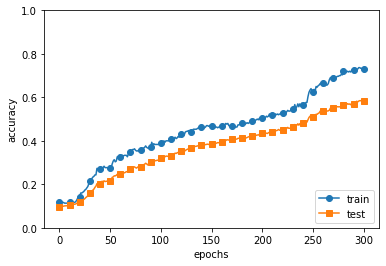

In [47]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

* 드롭아웃을 이용하면 표현력을 높이면서도 오버피팅을 억제할 수 있음

## 6.5 적절한 하이퍼파라미터 값
* 각 층의 뉴런 수, 배치 크기, 매개변수 개신 시 학습률과 가중치 감소 등
* 하이퍼파라미터의 값을 적절히 설정하지 않으면 모델의 성능이 크게 떨어짐 


### 6.5.1 검증 데이터
* 하이퍼파라미터의 성능을 평가할 때는 시험 데이터를 사용하면 안 됨(하이퍼파라미터 값이 시험 데이터에 오버피팅되기 때문)
* 검증 데이터 : 하이퍼파라미터 조정용 데이터

* 훈련 데이터 : 매개변수 학습
* 검증 데이터 : 하이퍼파라미터 성능 평가
* 시험 데이터 : 신경망의 범용 성능 평가

In [48]:
from common.util import shuffle_dataset

(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈련 데이터를 뒤섞는다.(훈련 데이터를 분리하기 전에 입력 데이터와 정답 레이블을 뒤섞음)
x_train, t_train = shuffle_dataset(x_train, t_train)

# 20%를 검증 데이터로 분할
validation_rate = 0.20
vaildation_num = int(x_train.shape[0])

x_val = x_train[:vaildation_num]
t_val = t_train[:vaildation_num]
x_train = x_train[vaildation_num:]
t_train = t_train[vaildation_num:]

### 6.5.2 하이퍼파라미터 최적화
* 하이퍼파라미터를 최적화할 때의 핵심 : 최적 값이 존재하는 범위를 조금씩 줄여간다는 것
* 대략적인 범위를 설정하고 그 범위에서 무작위로 하이퍼파라미터 값을 골라낸(샘플링) 후, 그 값을 정확도로 평가함


* 0단계 : 하이퍼파라미터 값의 범위를 설정
* 1단계 : 설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출
* 2단계 : 1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 검증 데이터로 정확도를 평가(에폭은 작게 설정)
* 3단계 : 1단계와 2단계를 특정 횟수(100회 등) 반복하며, 그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁힘 

* 베이즈 최적화 

### 6.5.3 하이퍼파라미터 최적화 구현하기
* 로그 스케일 범위에서 무작위로 추출해 수행 

val acc:0.05 | lr:5.319538258207043e-06, weight decay:3.584668870082037e-05
val acc:0.13 | lr:5.809132688047015e-06, weight decay:9.819259257563961e-06
val acc:0.13 | lr:0.0002138754719455832, weight decay:1.5834801615111948e-07
val acc:0.31 | lr:0.0022132590546672997, weight decay:1.4623026787676503e-05
val acc:0.06 | lr:1.9778114636219736e-05, weight decay:5.009151478520171e-05
val acc:0.1 | lr:6.286197387876601e-06, weight decay:2.5416113987653533e-08
val acc:0.18 | lr:3.7745914223850483e-06, weight decay:1.731311115856197e-08
val acc:0.19 | lr:4.082642728804299e-05, weight decay:7.303127082961952e-06
val acc:0.2 | lr:0.0011542372855914524, weight decay:5.699151112487343e-05
val acc:0.61 | lr:0.0045009576979435795, weight decay:2.6442396301102934e-06
val acc:0.68 | lr:0.008611423976802578, weight decay:4.65370632242506e-07
val acc:0.13 | lr:2.3616288910563847e-06, weight decay:6.974708691765555e-08
val acc:0.19 | lr:3.3433458996903848e-06, weight decay:1.7992907009652598e-07
val acc

Best-12(val acc:0.4) | lr:0.0031242076420945394, weight decay:1.0472927665527455e-06
Best-13(val acc:0.37) | lr:0.0030720085252316457, weight decay:3.338493902779861e-07
Best-14(val acc:0.36) | lr:0.0027356915927110384, weight decay:9.659809745000158e-08
Best-15(val acc:0.32) | lr:0.0007959121242057442, weight decay:1.994311853584122e-07
Best-16(val acc:0.32) | lr:0.001973836726983188, weight decay:5.2473485262114433e-08
Best-17(val acc:0.31) | lr:0.0022132590546672997, weight decay:1.4623026787676503e-05
Best-18(val acc:0.29) | lr:0.0022696085870117905, weight decay:5.802912147133298e-06
Best-19(val acc:0.28) | lr:0.001114173352909842, weight decay:2.1640524227714237e-07
Best-20(val acc:0.2) | lr:0.0011542372855914524, weight decay:5.699151112487343e-05


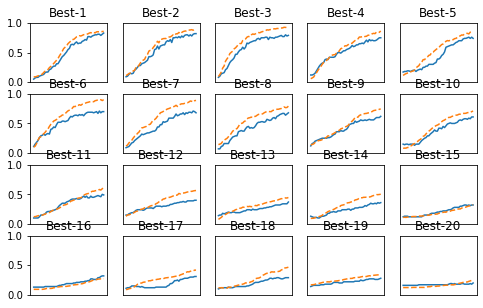

In [49]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

plt.figure(figsize=(8, 5))
for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()